In [138]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,FloatSlider
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [112]:
def S_wb(x, w, b):
    return 1 / (1 + np.exp(-(w * x + b)))

In [113]:
S_wb(1, 0.5 ,0)

np.float64(0.6224593312018546)

In [114]:
w =0.9
b =0.1
x = np.linspace(-10, 10,100)
y = S_wb(x, w, b)

In [115]:
type(y)

numpy.ndarray

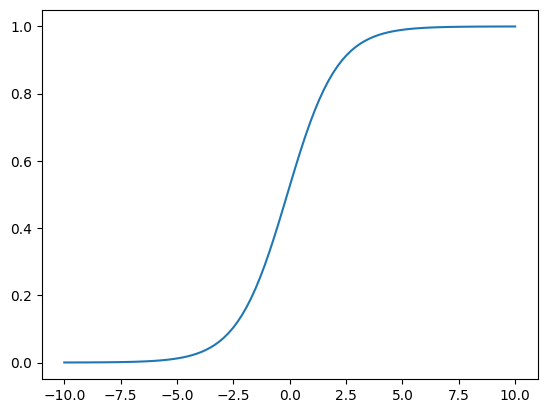

In [116]:
plt.plot(x, y)
plt.show()

interactive(children=(FloatSlider(value=0.9, description='w', max=2.0, min=-2.0), FloatSlider(value=0.9, descr…

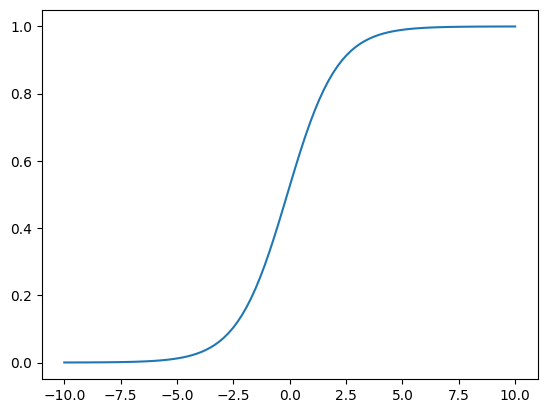

In [117]:
@interact(w=FloatSlider(min=-2, max=2, step=0.1, value=0.9),
          b=FloatSlider(min=-2, max=2, step=0.1, value=0.9))
def plot_sigmoid(w, b):
    x = np.linspace(-10, 10,100)
y = S_wb(x, w, b)
plt.plot(x, y)
plt.show()

In [118]:
def S_w1w2b(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(w1 * x1 + w2 * x2 + b)))

In [119]:
S_w1w2b(1,2,0.5,0,0)

np.float64(0.6224593312018546)

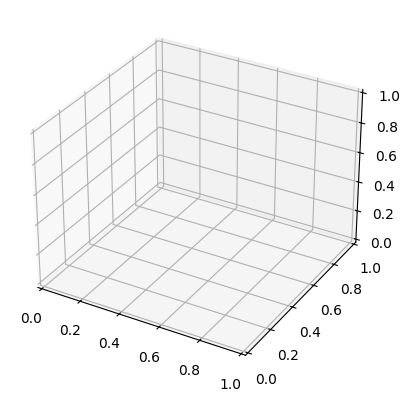

In [120]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.show()

In [147]:
import matplotlib.pyplot as plt


In [122]:
X1 = np.linspace(-10, 10,100)
X2 = np.linspace(-10, 10,100)
XX1, XX2 = np.meshgrid(x1, x2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [123]:
w1 = 2
w2 = -0.5
b = 0
Y = S_w1w2b(XX1, XX2, w1, w2, b)

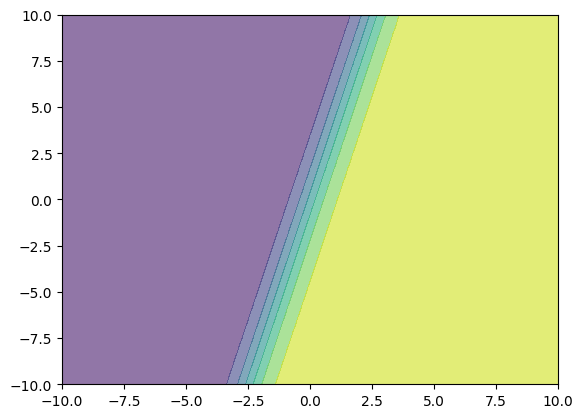

In [124]:
plt.contourf(XX1, XX2, Y,alpha=0.6)
plt.show()

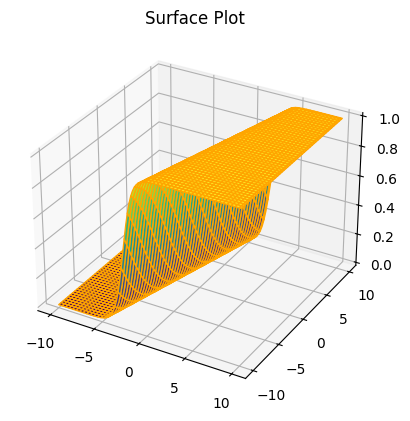

In [125]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis', edgecolor='orange')
ax.set_title('Surface Plot')
plt.show()

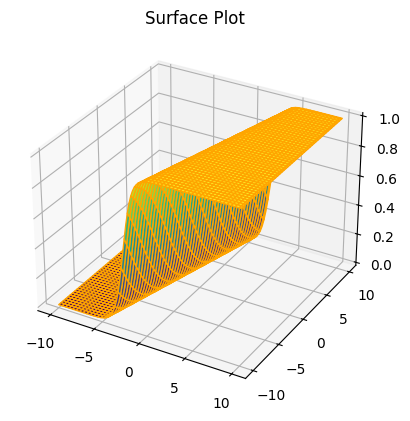

In [126]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis', edgecolor='orange')
ax.set_title('Surface Plot')
plt.show()

ax.view_init(30,0)

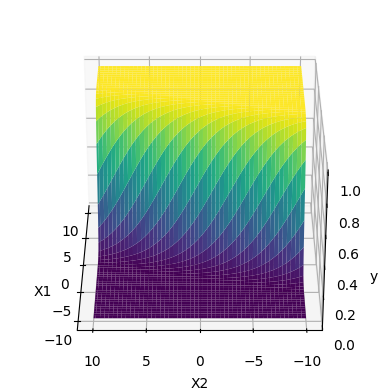

In [127]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.view_init(30,180)

PLOTTING LOSS

In [128]:
w_unknown=0.5
b_unknown=0.25

x=np.random.random(25)*20-10
y=S_wb(x,w_unknown,b_unknown)

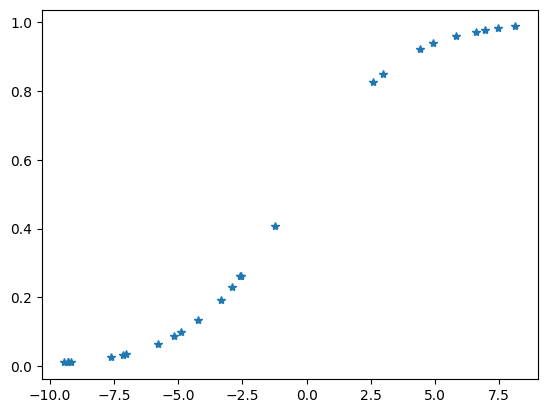

In [129]:
plt.plot(x,y,'*')
plt.show()

In [130]:
def calculate_loss(x, y, w_est, b_est):
    loss = 0
    for x,y in zip(x,y):
        loss += (y - S_wb(x, w_est, b_est))**2
    return loss
            

In [131]:
w=np.linspace(0,2,100)
b=np.linspace(-1,1,100)
ww, bb = np.meshgrid(w,b)
loss = np.zeros(ww.shape)

In [132]:
ww.shape, bb.shape

((100, 100), (100, 100))

In [133]:
for i in range(ww.shape[0]):
    for j in range(ww.shape[1]):
        loss[i,j] =calculate_loss(x,y,ww[i,j],bb[i,j])

Text(0.5, 0, 'loss')

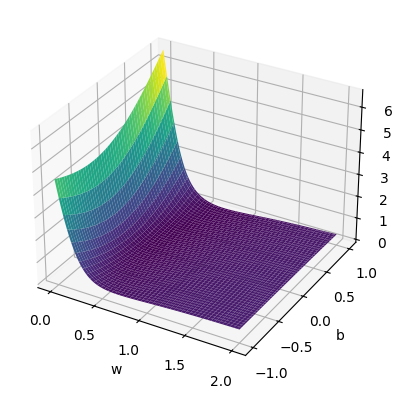

In [134]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
#ax.view_init(30,180)

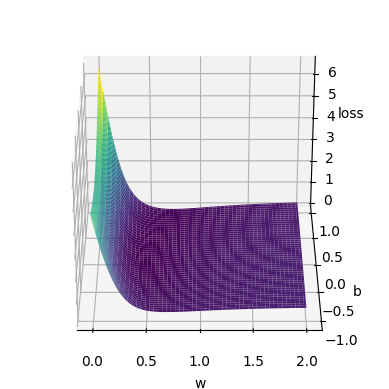

In [135]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')
ax.view_init(30,270)

In [136]:
np.argmin(loss)

np.int64(6225)

In [137]:
ij=np.argmin(loss)
i=np.floor(ij/loss.shape[1])
j=ij-i*loss.shape[1]

In [138]:
print(i,j)

62.0 25.0


In [139]:
ij=np.argmin(loss)
i=int(np.floor(ij/loss.shape[1]))
j=int(ij-i*loss.shape[1])

In [140]:
print(i,j)

62 25


In [141]:
print(ww[i,j],bb[i,j])

0.5050505050505051 0.2525252525252526


CLASS FOR SIGMOID NEUTRON

In [111]:
class sigmoid_neuron:
    def __init__(self):
        self.w=None
        self.b=None
    def perceptron(self, x):
        return np.dot(x,self.w.T)+self.b
    def sigmoid(self, x):
        return 1.0/(1.0+np.exp(-x))
    def grad_w(self, x, y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    def grad_b(self, x, y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    def fit(self, X, Y, epochs=1,learning_rate=1,initialize=True):
        # Initialize w, b
        self.w = np.random.randn(X.shape[1])
        self.b = 0
        for i in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
            self.w-=learning_rate*dw 
            self.b-=learning_rate*db
    def predict(self, X):
        y_pred=[]
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            y_pred.append(y_pred)  
        return np.array(y_pred)      

FOR TOY DATA

In [107]:
x =np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
y=[1,1,1,0,0,0]

In [108]:
sn = sigmoid_neuron()
sn.fit(x,y,1,0.25,True)

In [145]:
def plot_sn(x,y, sn):
    x1 = np.linspace(-10,10,100)
    x2 = np.linspace(-10,10,100)
    XX1, XX2 = np.meshgrid(x1, x2)
    yy =np.zeros(XX1.shape)
    for i in range(x2.size):
        for j in range(x1.size):
            val = np,asarray([x1[j], x2[i]])
            yy[i,j] = sn.sigmoid(sn.perceptron(val))
        plt.contourf(XX1, XX2, yy,cmap='viridis', alpha=0.6)
    plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', edgecolors='k')
    plt.plot()

In [152]:
sn.fit(x,y,1,0.25,True)
for i in range(10):
    sn.fit(x,y,1,0.25,False)
    print(sn.w, sn.b)



[0.64779157 1.45093378] 0.008959129784993206
[0.65710494 2.18671033] 0.029464437916648826
[-0.13135398 -2.03838941] 0.008676031500989096
[ 0.22756595 -0.05138858] -0.022169228592149242
[0.42414368 0.68170452] 0.0022378125481786353
[-0.14576655 -1.07386609] 0.03831434746288377
[-0.54855812 -0.80181175] 0.031993269913402206
[-0.91072573  0.88349168] -0.00022589033031830599
[-0.40250339 -0.26438628] 0.05708264903313381
[-1.2268301  -0.61684427] 0.01819204648789252


[ 1.47573539 -0.47025863] -0.05647036561178548


[]

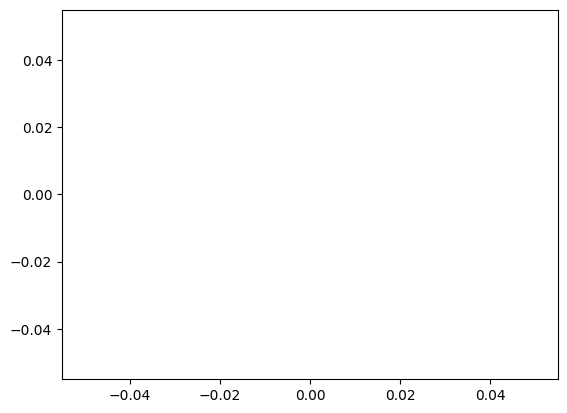

In [156]:
sn.fit(x,y,1,0.25,True)
for i in range(10):
    sn.fit(x,y,1,0.25,False)
print(sn.w, sn.b)
plt.plot()

LOAD DATA


In [18]:
data=pd.read_csv('D:/code/mobile_cleaned-1551253091700.csv')
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [19]:
data.shape


(341, 88)

In [20]:
x=data.drop('Rating',axis=1)

In [21]:
y=data['Rating']

In [22]:
x.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [23]:
y.head()

0    4.5
1    4.5
2    4.4
3    4.3
4    4.4
Name: Rating, dtype: float64

In [25]:
y=data['Rating'].values

In [26]:
y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [27]:
threshold=4
data['class'] = (data['Rating'] >= threshold)

In [28]:
data['class']

0       True
1       True
2       True
3       True
4       True
       ...  
336    False
337    False
338     True
339    False
340     True
Name: class, Length: 341, dtype: bool

In [38]:
threshold=4.1
data['class'] = (data['Rating'] >= threshold).astype(int)

In [39]:
data['class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    1
339    0
340    1
Name: class, Length: 341, dtype: int64

In [40]:
data['class'].value_counts()

class
1    200
0    141
Name: count, dtype: int64

In [41]:
data['class'].value_counts(normalize=True)

class
1    0.58651
0    0.41349
Name: proportion, dtype: float64

In [42]:
y_binarised=data['class'].values

In [46]:
from sklearn.preprocessing import StandardScaler


In [49]:
R =np.random.randn(100,3)

In [50]:
R

array([[ 1.97507775e+00, -4.80487987e-01, -3.72634617e-01],
       [ 1.17287215e+00,  1.04396597e-01,  4.11713976e-01],
       [-3.51293369e-01, -5.43401680e-01,  9.97635486e-01],
       [ 1.77838522e-01, -4.81117580e-01, -8.30259948e-01],
       [-4.07027378e-01,  6.58838921e-01,  8.07898423e-01],
       [ 1.12300611e+00,  7.39653881e-01,  7.05785927e-01],
       [ 8.40732086e-01, -7.29361052e-01,  1.50283369e-01],
       [ 1.07317618e+00,  2.37179513e-01, -3.01751106e-01],
       [-2.35952341e-01, -1.56267600e+00,  1.01853664e+00],
       [-5.03364617e-01, -5.18742524e-01, -3.38570906e-01],
       [-3.23819859e-01,  1.97297644e+00,  4.13884568e-01],
       [ 1.30277810e+00, -4.38656443e-01, -4.69458011e-01],
       [-7.22908917e-01, -1.19154213e+00, -3.89713966e-01],
       [ 9.06502675e-01,  1.76376871e+00, -1.41373863e-01],
       [-9.74982013e-01, -7.08772814e-01, -1.57578598e+00],
       [ 1.97013793e+00,  6.59854969e-01, -9.91507720e-01],
       [ 2.27398058e+00,  1.13219239e+00

<function matplotlib.pyplot.show(close=None, block=None)>

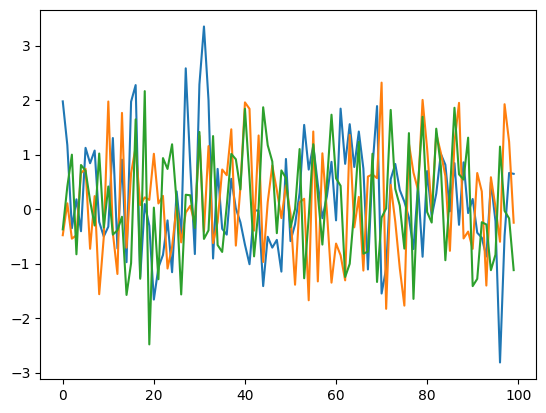

In [51]:
plt.plot(R)
plt.show

In [52]:
np.mean(R)

np.float64(0.15000693224668307)

In [53]:
np.std(R)

np.float64(0.9891985322595221)

In [55]:
R =np.random.randn(100,5)

In [56]:
R

array([[-0.05312484,  0.2358417 , -0.28776525, -1.27379172,  1.87598453],
       [-0.15553396, -1.15348001, -0.16706249, -0.65917491,  0.7326893 ],
       [-0.43596376, -1.27105372,  0.73180612, -0.0469156 , -0.90403895],
       [ 0.44149686,  0.4749824 , -1.39641001,  0.57958894, -3.25873919],
       [-0.97863169,  1.51026838, -0.13934053,  0.51984606, -1.39597877],
       [ 0.45780557,  0.13263733, -0.00891202, -1.51996293,  0.11332177],
       [-0.17278665,  0.85743319, -2.36198454, -0.16659084, -1.08789622],
       [ 0.17341904,  0.43540196, -0.66095548, -0.58011277,  0.07609905],
       [-0.85097701, -1.52865774,  0.80506086, -2.28398373,  1.09720854],
       [-0.99168873,  0.93260831,  2.18870942, -1.10655526, -0.02234495],
       [-0.82184825,  1.05909292, -0.6986233 ,  0.32049005,  0.31908674],
       [ 0.82042424, -0.45653901,  0.10563917,  0.13562939, -1.18591111],
       [-0.22346302,  0.85324032,  0.39465613, -1.81859235, -0.23671865],
       [-2.17142675,  0.60588267,  1.3

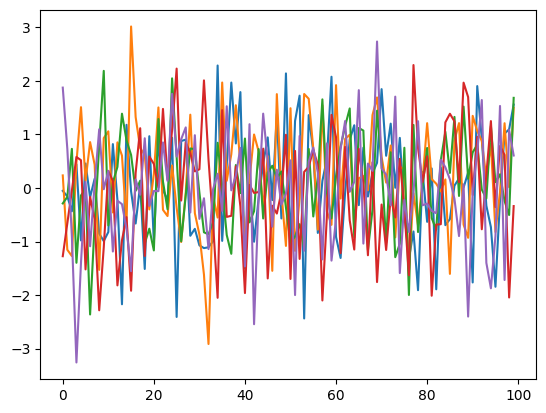

In [57]:
plt.plot(R)
plt.show()

In [58]:
scaler = StandardScaler()


In [59]:
scaler.fit(R)

,copy,True
,with_mean,True
,with_std,True


In [61]:
scaler.mean_

array([ 0.00509129,  0.22494285,  0.07278763, -0.06027869, -0.01608192])

In [62]:
RT=scaler.transform(R)

In [63]:
np.mean(RT)

np.float64(-7.105427357601002e-18)

In [64]:
np.std(RT)

np.float64(0.9999999999999999)

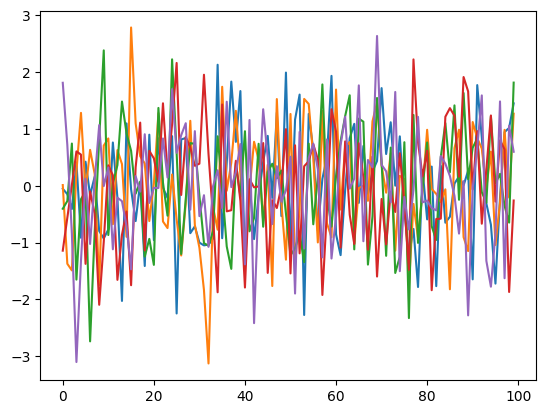

In [65]:
plt.plot(RT)
plt.show()

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0, stratify=y_binarised) 

In [69]:
print(x_train.shape, x_test.shape)

(255, 87) (86, 87)


In [70]:
scaler=StandardScaler()

In [71]:
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.transform(x_test)

In [74]:
MinMaxScaler = MinMaxScaler()

In [75]:
y_scaled_train=MinMaxScaler.fit_transform(y_train.reshape(-1,1))

In [76]:
np.min(y_scaled_train)

np.float64(0.0)

In [77]:
y_scaled_test=MinMaxScaler.transform(y_test.reshape(-1,1))

In [90]:
scled_threshold=MinMaxScaler.transform(np.array([threshold]).reshape(1,-1))[0][0]

In [91]:
scled_threshold

np.float64(0.6399999999999999)

In [96]:
y_binarised_train = (y_scaled_train > scled_threshold).astype(int).ravel()

In [97]:
y_binarised_train

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [98]:
y_binarised_test = (y_scaled_test > scled_threshold).astype(int).ravel()

In [99]:
y_binarised_test

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [112]:
sn = sigmoid_neuron()



In [113]:
sn.fit(x_scaled_train,y_binarised_train,epochs=10,learning_rate=0.2)

In [133]:
def predict(self, X):
    y_preds = []  # Create a list to store predictions
    for x in X:
        y_pred = self.sigmoid(self.perceptron(x))
        y_preds.append(y_pred)  # Append to the list, not to itself
    return np.array(y_preds)

In [137]:
# Step 1: Make predictions (run this first)
y_pred_train = sn.predict(x_scaled_train)
y_pred_test = sn.predict(x_scaled_test)

# Step 2: Define threshold
scaled_threshold = 0.5

# Step 3: Binarize predictions
y_pred_binarised_train = (y_pred_train > scaled_threshold).astype(int).ravel()
y_pred_binarised_test = (y_pred_test > scaled_threshold).astype(int).ravel()

# Step 4: Check the results
print("Train predictions (first 10):", y_pred_binarised_train[:10])
print("Test predictions (first 10):", y_pred_binarised_test[:10])

AttributeError: 'numpy.float64' object has no attribute 'append'

In [ ]:
accuracy_score = accuracy_score(y_binarised_test, y_pred_binarised_test)
accuracy_score = accuracy_score(y_binarised_train, y_pred_binarised_train)


NameError: name 'y_pred_binarised_test' is not defined